In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [56]:
# reading the dataset
df_2022 = pd.read_csv("../Dataset/SCFP2022.csv")
print("df_2022 shape:", df_2022.shape)
df_2022.head()

df_2022 shape: (22975, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


In [57]:
df_2019 = pd.read_csv("../Dataset/SCFP2019.csv")
print("df_2019 shape:", df_2019.shape)
df_2019.head()

df_2019 shape: (28885, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


In [58]:
df_2019.columns

Index(['YY1', 'Y1', 'WGT', 'HHSEX', 'AGE', 'AGECL', 'EDUC', 'EDCL', 'MARRIED',
       'KIDS',
       ...
       'NWCAT', 'INCCAT', 'ASSETCAT', 'NINCCAT', 'NINC2CAT', 'NWPCTLECAT',
       'INCPCTLECAT', 'NINCPCTLECAT', 'INCQRTCAT', 'NINCQRTCAT'],
      dtype='object', length=356)

In [59]:
df_2022.columns

Index(['YY1', 'Y1', 'WGT', 'HHSEX', 'AGE', 'AGECL', 'EDUC', 'EDCL', 'MARRIED',
       'KIDS',
       ...
       'NWCAT', 'INCCAT', 'ASSETCAT', 'NINCCAT', 'NINC2CAT', 'NWPCTLECAT',
       'INCPCTLECAT', 'NINCPCTLECAT', 'INCQRTCAT', 'NINCQRTCAT'],
      dtype='object', length=356)

In [60]:
assert (df_2019.columns.all() == df_2022.columns.all())

In [61]:
df_2022.isnull().sum()

YY1             0
Y1              0
WGT             0
HHSEX           0
AGE             0
               ..
NWPCTLECAT      0
INCPCTLECAT     0
NINCPCTLECAT    0
INCQRTCAT       0
NINCQRTCAT      0
Length: 356, dtype: int64

### This shows that all the features are same in both the surveys , in 2019 and in 2022 

# Mainly the features of the dataset can be categorised into following categories

>## TECHNICAL

>## DEMOGRAPHICS

>## ASSETS

>## DEBTS

>## RATIOS

>## DEBT PAYMENTS

>## SHOPPING PATTERNS

>## ATTITUDINAL

>## INCOME

>## CAPITAL GAINS

>## NETWORTH

>## EXPENDITURES

>## HYPOTHETICAL FINANCIAL EMERGENCY RESPONSES

## Firslty we will perform the univariate Analysis on the important features presen in each category to get to know about the dataset

# Demographics

# Age 
## denoted by AGE in the dataset

In [62]:
df_2022['AGE'].head()

0    70
1    70
2    70
3    70
4    70
Name: AGE, dtype: int64

In [63]:
df_2022['AGE'].describe()

count    22975.000000
mean        54.468988
std         16.189081
min         18.000000
25%         42.000000
50%         56.000000
75%         67.000000
max         95.000000
Name: AGE, dtype: float64

In [64]:
# Extract the 'age' column
ages = df_2022['AGE']

# Create an interactive histogram using Plotly
fig = px.histogram(ages, nbins=20, title='Histogram of Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Frequency', height = 500, width = 900)

# Show the plot
fig.show()

In [65]:
ages = df_2022['AGE']

# Create age bins of 20 years
bins = range(0, max(ages) + 20, 20)

# Create age groups using pd.cut() and compute the number of people in each group
age_groups = pd.cut(ages, bins)
age_group_counts = age_groups.value_counts().sort_index()

# Plot the histogram
fig = px.bar(x=age_group_counts.index.astype(str), y=age_group_counts.values, 
             labels={'x': 'Age Group', 'y': 'Number of People'}, 
             title='Number of People in Each 20-Year Age Group')
fig.update_layout(xaxis={'categoryorder':'total ascending'}, height=400, width=600)  # Adjust height and width as needed
fig.show()

## MOST PEOPLE ARE IN THE RANGE OF 40 TO 60 AND 60 TO 80

## Gender of the household
### denoted by HHSEX in the dataset
###  Males are represented by 1 and females are represented by 2

In [66]:
df_2022['HHSEX'] = df_2022['HHSEX'].replace({1: 'Male', 2: 'Female'})

# Convert the column to categorical data type
df_2022['HHSEX'] = df_2022['HHSEX'].astype('category')

In [67]:
df_2022['HHSEX'].head()

0    Female
1    Female
2    Female
3    Female
4    Female
Name: HHSEX, dtype: category
Categories (2, object): ['Female', 'Male']

In [68]:
df_2022['HHSEX'].value_counts()

Male      17485
Female     5490
Name: HHSEX, dtype: int64

In [69]:
# plotting the bar charts for the distribution of gender
# Count the occurrences of each category
gender_counts = df_2022['HHSEX'].value_counts()

# Plot the bar chart
fig = px.bar(x=gender_counts.index, y=gender_counts.values, labels={'x': 'Gender', 'y': 'Count'}, 
             title='Bar Chart of Gender')
fig.update_layout(height = 500, width = 850)
fig.show()

## Around 76 % of the people in the survey are Males and rest 23% are females

# Highest completed grade of the Person 
## The values are as follows
    -1  LESS THAN 1ST GRADE
	1	1ST, 2ND, 3RD, OR 4TH GRADE
	2	5TH OR 6TH GRADE
	3	7TH OR 8TH GRADE
	4	9TH GRADE
    5	10TH GRADE
	6	11TH GRADE
	7	12TH GRADE, NO DIPLOMA
	8	HIGH SCHOOL GRADUATE - HIGH SCHOOL DIPLOMA OR EQUIVALENT
	9	SOME COLLEGE BUT NO DEGREE
	10	ASSOCIATE DEGREE IN COLLEGE - OCCUPATION/VOCATION PROGRAM
	11	ASSOCIATE DEGREE IN COLLEGE - ACADEMIC PROGRAM
    12	BACHELOR'S DEGREE (FOR EXAMPLE: BA, AB, BS)
    13	MASTER'S DEGREE
	14	DOCTORATE OR PROFESSIONAL SCHOOL DEGREE

In [70]:
df_2022['EDUC'].unique()

array([ 9, 12, 14,  8, 13, 10,  4, 11,  3,  6,  2,  5,  1,  7, -1],
      dtype=int64)

In [71]:
df_2022['EDUC'].value_counts()

 12    5908
 8     4522
 13    3322
 9     2842
 14    2138
 10    1152
 11     945
 7      471
 6      395
 4      306
 5      285
 2      265
 3      231
 1      133
-1       60
Name: EDUC, dtype: int64

Text(0.5, 1.0, 'Status of education of the people in Survey')

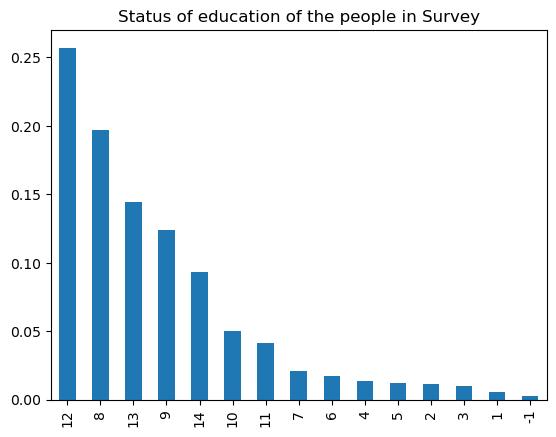

In [72]:
df_2022['EDUC'].value_counts(normalize = True).plot(kind = "bar")
plt.title("Status of education of the people in Survey")

## Most of the Peoples are 
> BACHELOR'S DEGREE (FOR EXAMPLE: BA, AB, BS)

> HIGH SCHOOL GRADUATE - HIGH SCHOOL DIPLOMA OR EQUIVALENT

> MASTER'S DEGREE

> SOME COLLEGE BUT NO DEGREE

> DOCTORATE OR PROFESSIONAL SCHOOL DEGREE

## MARITAL STATUS OF THE PERSON
### denoted by MARRIED in the dataset

### 1 represents married/living with partner
### 2 represents neither married nor living with partner

In [73]:
# Replace 1 with 'Married' and 2 with 'Unmarried'
df_2022['MARRIED'] = df_2022['MARRIED'].replace({1: 'Married', 2: 'Unmarried'})

# Convert the column to categorical data type
df_2022['MARRIED'] = df_2022['MARRIED'].astype('category')

In [74]:
df_2022['MARRIED'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Married', 'Unmarried']

In [75]:
df_2022['MARRIED'].value_counts()

Married      14525
Unmarried     8450
Name: MARRIED, dtype: int64

In [76]:
fig = px.bar(x=df_2022['MARRIED'].value_counts().index,
             y=df_2022['MARRIED'].value_counts().values,
             labels={'x': 'Marital Status', 'y': 'Count'}, 
             title='Bar Chart of Married Status')
fig.update_layout(height  = 450 , width = 800)
fig.show()

# Race/ethnicity of respondent
## denoted by RACE in the dataset

## The values present in the feature have following information

> 1 = white non-Hispanic

> 2 = black / African American

> 3 = Hispanic

> 4 = Asian

> 5 = Other

In [77]:
df_2022['RACE'] = df_2022['RACE'].replace({1: 'White non-Hispanic', 2: 'Black/African American', 
                                           3: 'Hispanic', 4: 'Asian', 5: 'Other'})

# Convert the 'race' column to categorical data type
df_2022['RACE'] = df_2022['RACE'].astype('category')

In [78]:
df_2022['RACE'].value_counts()

White non-Hispanic        14349
Black/African American     3493
Hispanic                   3075
Asian                      1785
Other                       273
Name: RACE, dtype: int64

In [79]:
race_counts = df_2022['RACE'].value_counts()

# Plot the bar chart
fig = px.bar(x=race_counts.index, y=race_counts.values, labels={'x': 'Race', 'y': 'Count'}, 
             title=' Bar Chart of Race'
            )
fig.update_layout(height = 450)
fig.show()

## Most of the people in the survey are White non-hispanic

# Occupation classification for reference person
## denoted by OCCAT2 in the dataset
### The values are given as follows

>1=managerial/professional 

>2=technical/sales/services

>3=other (incl. production/craft/repair workers, operators, laborers, 
  farmers, foresters, fishers) 
  
>4=not working


In [80]:
# renaming the column to "Occupation" 
df_2022.rename(columns = {'OCCAT2':'Occupation'}, inplace=True)

In [81]:
df_2022['Occupation'].head(10)

0    4
1    4
2    4
3    4
4    4
5    1
6    1
7    1
8    1
9    1
Name: Occupation, dtype: int64

In [82]:
df_2022['Occupation'].tail(5)

22970    4
22971    4
22972    4
22973    4
22974    4
Name: Occupation, dtype: int64

In [83]:
df_2022['Occupation'].value_counts()

1    9425
4    6595
2    3805
3    3150
Name: Occupation, dtype: int64

In [84]:
occupation_mapping = {1: 'managerial/professional ', 2: 'technical/sales/services',
                            3: 'other(like craftmen)', 4: 'not working'}

legend_data = [{'Occupation': occupation_mapping[key], 'Code': key} for key in occupation_mapping]

df_2022['Occupation'] = df_2022['Occupation'].map(occupation_mapping).astype('category')
occupation_counts = df_2022['Occupation'].value_counts()

In [85]:
fig = go.Figure()

fig.add_trace(go.Bar(x=occupation_counts.index, y=occupation_counts.values, 
                     marker=dict(color='skyblue')))
fig.update_layout(title='Occupation Counts',
                  xaxis_title='Occupation',
                  yaxis_title='Count')

## Most of the people are At managerial positions or they are note working

# Household has been turned down for credit in the past 5 years
## denoted by TURNDOWN in the dataset
> 0 represents that its not been turned down for credit

> 1 represents that its been turned down for credit

In [86]:
df_2022['TURNDOWN'].unique()

array([0, 1], dtype=int64)

In [87]:
df_2022['TURNDOWN'].value_counts()

0    20949
1     2026
Name: TURNDOWN, dtype: int64

<BarContainer object of 2 artists>

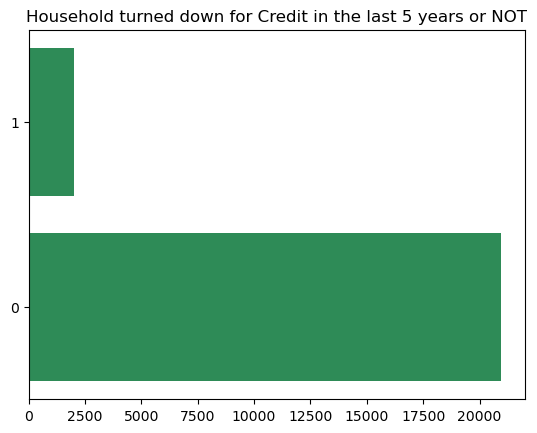

In [88]:
df_2022['TURNDOWN'].value_counts().plot(kind= "barh")
plt.title("Household turned down for Credit in the last 5 years or NOT");
plt.barh(df_2022['TURNDOWN'].value_counts().index, df_2022['TURNDOWN'].value_counts().values,
         color="seagreen",
        )
# plt.legend()

## most of the people are not denied credit in the last 5 years 

# Household has been turned down for credit or feared being denied credit in the past 5 years
## denoted by TURNFEAR in the dataset
## 0 represents that its not turned down for credit or feared being denied credit
## 1 reprsents the opposite case

In [89]:
df_2022['TURNFEAR'].unique()

array([0, 1], dtype=int64)

<BarContainer object of 2 artists>

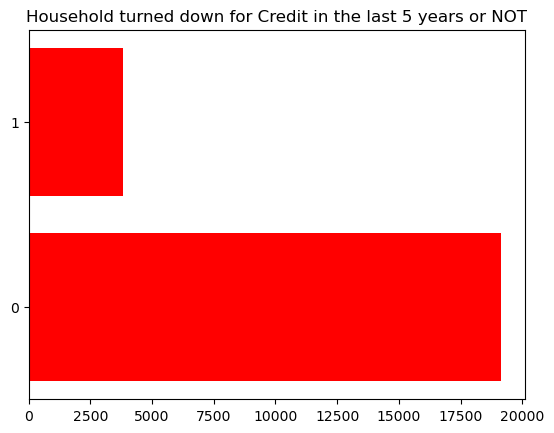

In [90]:
df_2022['TURNFEAR'].value_counts().plot(kind= "barh")
plt.title("Household turned down for Credit in the last 5 years or NOT");
plt.barh(df_2022['TURNFEAR'].value_counts().index, df_2022['TURNFEAR'].value_counts().values,
         color="red"
        )

In [91]:
df_2022["TURNFEAR"].value_counts(normalize=True)

0    0.832905
1    0.167095
Name: TURNFEAR, dtype: float64

## Around 83 % of the people are not turned down for credit or feared being denied credit in the last 5 years

# Total value of assets held by household
## denoted by ASSET in the dataset

In [92]:
df_2022['ASSET'].dtype

dtype('float64')

In [93]:
df_2022['ASSET'].describe()

count    2.297500e+04
mean     2.031731e+07
std      1.109257e+08
min      0.000000e+00
25%      6.385000e+04
50%      5.398000e+05
75%      2.716900e+06
max      2.387781e+09
Name: ASSET, dtype: float64

In [94]:
(df_2022['ASSET']/10e3).describe()

count     22975.000000
mean       2031.731139
std       11092.574939
min           0.000000
25%           6.385000
50%          53.980000
75%         271.690000
max      238778.090000
Name: ASSET, dtype: float64

### The assets are positively skewed becaue of outliers present , means maximum households have asset value in the range of 75% people but there are some very rich households

In [95]:
# df_2022['ASSET'] /=1000
fig = px.box(df_2022, y='ASSET', title='Box Plot of Total ASSET hold by household')

# Update x and y labels
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Asset Values')

# Show the plot
fig.show()

## The box plot also shows that there are number of outliers present

# Analysing Whether Pension exists for either reference person or spouse
## denoted by ANYPEN in the dataset
### 1 denotes that the Reference person or spouse has any type of pension from a current or past job.
### 0 denotes that no pension exists for the reference Person.

In [98]:
df_2022['ANYPEN'].unique()

array([0, 1], dtype=int64)

In [99]:
# Replace 0 with 'No' and 1 with 'Yes' in the ANYPEN column
df_2022['ANYPEN'] = df_2022['ANYPEN'].replace({0: 'No', 1: 'Yes'})

# Rename the column to 'Pension'
df_2022.rename(columns={'ANYPEN': 'Pension'}, inplace=True)

In [101]:
df_2022['Pension'].head()

0    No
1    No
2    No
3    No
4    No
Name: Pension, dtype: object

In [102]:
df_2022['Pension'].value_counts(normalize  = True)

Yes    0.561349
No     0.438651
Name: Pension, dtype: float64

In [104]:
pension_counts  = df_2022['Pension'].value_counts()
fig = px.bar(x=pension_counts.index, y=pension_counts.values, 
             labels={'x': 'Person has pension or Not', 'y': 'Count'},
             title='Distribution Of Persons having Pension or NOT')

# Show the plot
fig.show()

df_2022['Pension'].value_counts(normalize  = True)

Yes    0.561349
No     0.438651
Name: Pension, dtype: float64

## Around 56 % people have pension for them
## Around 44 % people dont have any pension available in any form

# Analysing whether person has Stocks 
## denoted by HSTOCKS in the dataset
## 1 denotes the person has stocks 
## 0 represents the person doesnt have stocks

In [107]:
# Replace 0 with 'No' and 1 with 'Yes' in the ANYPEN column
df_2022['HSTOCKS'] = df_2022['HSTOCKS'].replace({0: 'No', 1: 'Yes'})

# Rename the column to 'Pension'
df_2022.rename(columns={'HSTOCKS': 'Has_Stocks'}, inplace=True)
df_2022['Has_Stocks'].head(8)

0    No
1    No
2    No
3    No
4    No
5    No
6    No
7    No
Name: Has_Stocks, dtype: object

In [108]:
df_2022['Has_Stocks'].value_counts()

No     16286
Yes     6689
Name: Has_Stocks, dtype: int64

In [109]:
df_2022['Has_Stocks'].value_counts(normalize=True)

No     0.708857
Yes    0.291143
Name: Has_Stocks, dtype: float64

In [111]:
stock_counts  = df_2022['Has_Stocks'].value_counts()
fig = px.bar(x=stock_counts.index, y=stock_counts.values, 
             labels={'x': 'Person has Stocks or Not', 'y': 'Count'},
             title='Distribution Of Persons having Stocks or NOT')

# Show the plot
fig.show()

## Around 30 % people hold stocks,while 70 % people doesnt hold stocks

# Analysing Features Which are related to debts , for different household

# Whether Person has any debt or NOT
## Denoted by HDEBT in the dataset
## 1 represents person has debt and 0 represents person has no debt

In [110]:
df_2022['HDEBT'] = df_2022['HDEBT'].replace({0:"No",1:"Yes"})
df_2022.rename(columns={'HDEBT':'Has_debt'},inplace=True)

df_2022['Has_debt'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Has_debt, dtype: object

In [119]:
df_2022['Has_debt'].nunique()

2

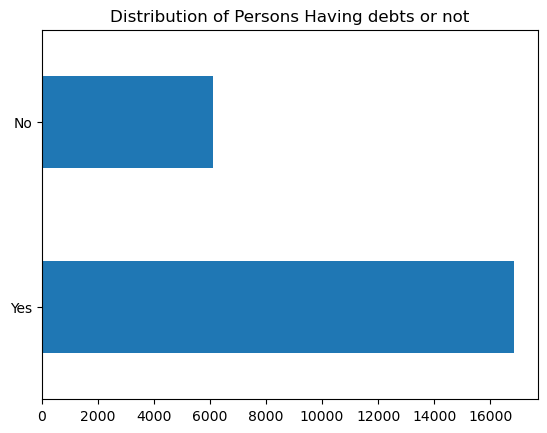

In [122]:
df_2022['Has_debt'].value_counts().plot(kind = "barh")
plt.title("Distribution of Persons Having debts or not");

# Analysing Income Related features 

In [123]:
df_2022['INCOME'].dtype

dtype('float64')

In [128]:
(df_2022['INCOME']/10e3).describe()

count    22975.000000
mean       159.285521
std       1244.271039
min          0.000000
25%          4.215556
50%          9.403933
75%         26.482340
max      45823.094940
Name: INCOME, dtype: float64

## The Income feature is right skewed means there are some people who have very large incomes

<Axes: >

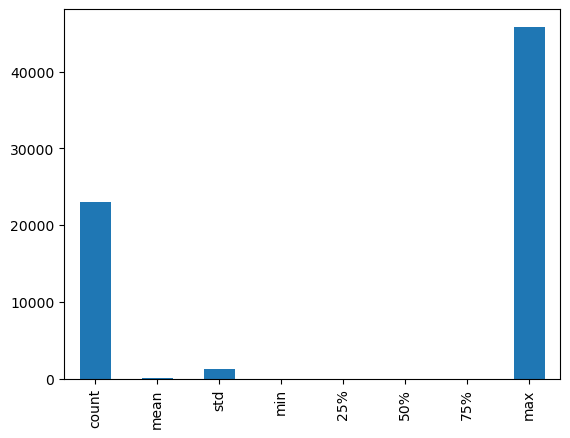

In [139]:
(df_2022['INCOME']/10e3).describe().plot(kind= "bar")